# Makine Öğrenmesi Dersleri: Boyut Azaltma: PCA

In [1]:
from IPython.display import Image
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Boyut Azaltma (Dimensionality Reduction) veri bilimi için oldukça önemli bir method. Neden önemli olduğuna dair ilk aklıma gelenler şöyle:
- Gerçek hayattaki veriler üniversitede veya online kurslarda karşımıza çıkan verilerin aksine genelde çok daha fazla boyuta (özniteliğe) sahip oluyor ve boyut büyüdükçe veri temizlemeden model kurmaya bütün süreçlerde harcamamız gereken zaman ve kaynaklar artıyor.
- Ne kadar çok boyuta sahip olursak görselleştirme de o kadar zor oluyor. 3 boyuttan sonrasını hayal etmek zor ama görsel olarak da yaptığımız çalışmanın bir karşılığı olsun insanlara anlatalım istiyoruz.
- Hemen her veri setinde bazı öznitelikler arasında yüksek korelasyon oluyor ve bu bizim gereksiz bilgiye sahip olmamıza ve modelimizde overfitting problemine sebep olabiliyor.

 PCA (Principal Component Analysis) methodu yüksek boyutlu bir veri setinin boyutunu azaltmak için kullanılan en yaygın yöntemlerden biri. Bu yazıda arka planda ne olup bittiğinden ve bu yöntemden kısaca bahsedeceğim.
 
### Peki Nasıl?

Boyut küçültmenin en kolay yolu verimizi en iyi tanımlayan öznitelikleri bulup diğerlerini atmak diğer bir deyişle öznitelik seçimi (feature selection) yapmak. Örneğin 100 boyuttan 10 tanesinin önemli olduğuna ulaşıp kalan 90 özniteliği atmak ama bu tahmin edeceğiniz gibi bilgi kaybına sebep oluyor.
Bizim uğraşmamız gereken şey ise öznitelik çıkarımı (feature extraction) yapmak diğer bir deyişle mümkün olan en az bilgi kaybıyla boyut küçültmek. Bunu yapmak için verideki dağılımın maksimum varyansını-bilgisini tutan minimum sayıda değişken oluşturuyoruz. Eğer bir değişken her örnek için aynı değere sahip ise gereksiz bir değişkendir biz en yüksek varyansa sahip olan değişkenleri bulmalıyız. Buna en güzel örneklerden biri HDI (İnsani Kalkınma Endeksi) hesaplaması olabilir. Ülkelerin sahip olduğu değişkenlerden bazıları (wiki): resmi dil, yüz ölçümü (toplam), su oranı, nüfus, nüfus yoğunluğu, GSYH, para birimi, trafik akışı, hukuk, dış ilişkiler, din, eğitim, sağlık, turizm…
Yukarıdaki ek olarak ülkeden ülkeye değişen yüzlerce değişken sıralayabiliriz. Tahmin edersiniz ki bunu modele dökmek oldukça sancılı olacaktır. HDI hesaplarında ise sadece 5 özelliğe bakılarak pek de itiraz edilmeyecek bir tablo karşımıza çıkıyor.
- Beklenen ortalama yaşam süresi
- Beklenen eğitim yılı
- Ortalama eğitim yılı
- Kişi başına düşen gayri safi milli gelir
- Kişi başına düşen gayri safi milli gelir sıralaması — HDI sıralaması

En temel örneklerden olan el yazısı verisi üzerinde PCA modelini uygulayalım ne kadar kolay olduğuna şaşıracaksanız.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
%matplotlib inline
from sklearn import datasets
from sklearn import decomposition

Kütüphaneler tamam şimdi sklearn veri setinde yer alan el yazısı veri setini yükleyelim ve X, y değişkenlerine bakalım.

In [3]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [4]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


Veri setimizde farklı şekilde yazılmış 1797 rakam var ve her rakam 64 boyutlu bir matrisle ifade ediliyor. Her rakam için çok farklı temsiller (vektörler) mevcut malum herkesin el yazısı farklı :)

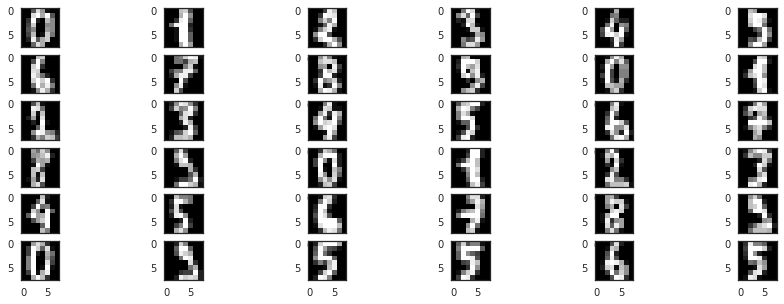

In [5]:
plt.figure(figsize=(15, 5))
for i in range(36):
    plt.subplot(6,6, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray')

El yazısıyla yazılmış 0 ve 1 rakamlarını temsil eden farklı vektörlere bi bakalım.

In [6]:
print('Vektorunu gostermek istedigim rakam: {0} '.format(y[0]))
print('')
print(X[0])
print('')
print('Vektorunu gostermek istedigim rakam: {0} '.format(y[10]))
print('')
print(X[10])

Vektorunu gostermek istedigim rakam: 0 

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

Vektorunu gostermek istedigim rakam: 0 

[ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
 16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
  0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
  0.  0.  0.  0.  1. 10. 13.  3.  0.  0.]


In [7]:
print('Vektorunu gostermek istedigim rakam: {0} '.format(y[1]))
print('')
print(X[1])
print('')
print('Vektorunu gostermek istedigim rakam: {0} '.format(y[11]))
print('')
print(X[11])

Vektorunu gostermek istedigim rakam: 1 

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]

Vektorunu gostermek istedigim rakam: 1 

[ 0.  0.  0.  0. 14. 13.  1.  0.  0.  0.  0.  5. 16. 16.  2.  0.  0.  0.
  0. 14. 16. 12.  0.  0.  0.  1. 10. 16. 16. 12.  0.  0.  0.  3. 12. 14.
 16.  9.  0.  0.  0.  0.  0.  5. 16. 15.  0.  0.  0.  0.  0.  4. 16. 14.
  0.  0.  0.  0.  0.  1. 13. 16.  1.  0.]


0 rakamını temsil eden vektörler arasında farklılık var kabul fakat 1 rakamını temsil eden vektörlere kıyasla fark oldukça az. Bunu daha görünür yapmak için PCA dönüşümünü uygulayıp ve rakamların iki boyutlu dünyasına bakalım.

In [8]:
digits_transformed = decomposition.PCA(2).fit_transform(digits.data)
digits_transformed = decomposition.PCA(2).fit_transform(digits.data)
print('PCA dönüşümden sonra 0 rakamının vektörleri')
print('')
print(digits_transformed[0])
print(digits_transformed[10])
print('')
digits_transformed = decomposition.PCA(2).fit_transform(digits.data)
print('PCA dönüşümden sonra 1 rakamının vektörleri')
print('')
print(digits_transformed[1])
print(digits_transformed[11])

PCA dönüşümden sonra 0 rakamının vektörleri

[-1.25946455 21.27488201]
[11.21507964 16.91986201]

PCA dönüşümden sonra 1 rakamının vektörleri

[  7.95761098 -20.76870433]
[  3.00918385 -11.99481617]


In [9]:
digits_transformed = decomposition.PCA(2).fit_transform(digits.data)
print(digits_transformed[1])
print(digits_transformed[11])

[  7.95761343 -20.76869912]
[  3.00917619 -11.99481896]


Vektörler arasındaki uzaklığa hızlıca bakarsak kötü bir dönüşüm olmadığını anlarız.
Şimdi bütün rakamların PCA dönüşümü sonrasındaki iki boyutlu vektörlerini resmedelim, rengarenk bir dünya bizi bekliyor.

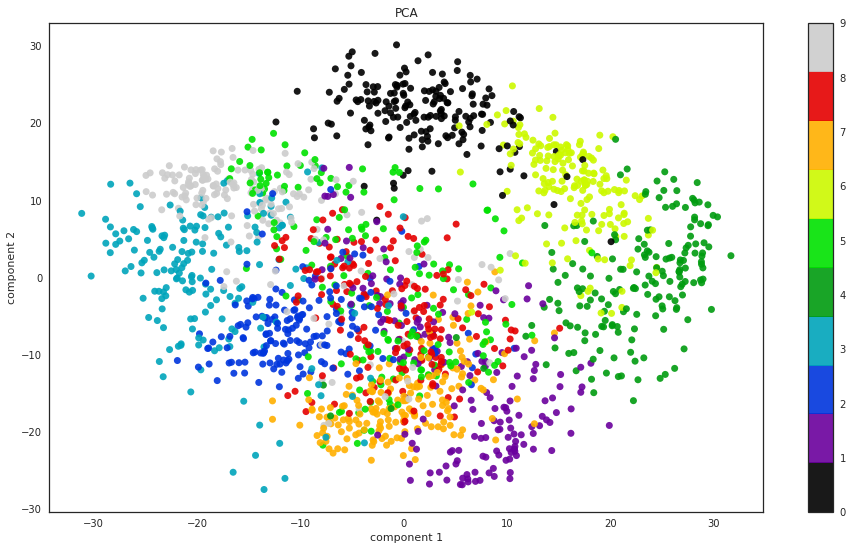

In [10]:
plt.figure(figsize=(16,9))
plt.scatter(digits_transformed[:, 0], digits_transformed[:, 1], c=digits.target, 
            edgecolor='none', alpha=0.9,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('PCA')
plt.colorbar()
plt.show()